HOTEL PRICE FLUCTUATIONS
---
How do hotel prices fluctuate over time in different regions?

In [26]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [27]:
#File to load
hotel_bookings_file = Path("Resources/hotel_bookings_dataset.csv")
tourism_file = Path("Resources/tourism_dataset.csv")

#Read file and store into Pandas DataFrames
hotel_data = pd.read_csv(hotel_bookings_file)
tourism_data = pd.read_csv(tourism_file)


Data cleaning 
---

In [28]:
# Remove specified columns from the DataFrame
columns_to_remove = [
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
    'market_segment', 'distribution_channel', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
    'agent', 'company', 'days_in_waiting_list', 'customer_type',
    'required_car_parking_spaces', 'total_of_special_requests',
    'reservation_status', 'reservation_status_date', 'is_canceled', 'lead_time',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations'
]

hotel_data = hotel_data.drop(columns=columns_to_remove)
hotel_data.head()

,hotel,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,country,adr
0,Resort Hotel,2015,July,0,0,PRT,0.0
1,Resort Hotel,2015,July,0,0,PRT,0.0
2,Resort Hotel,2015,July,0,1,GBR,75.0
3,Resort Hotel,2015,July,0,1,GBR,75.0
4,Resort Hotel,2015,July,0,2,GBR,98.0


In [29]:
# Combine 'stays_in_weekend_nights' and 'stays_in_week_nights' into a new column 'total_stays_days'
hotel_data['total_stays_days'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
hotel_data = hotel_data.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])

# Display the updated hotel_data DataFrame
hotel_data


,hotel,arrival_date_year,arrival_date_month,country,adr,total_stays_days
0,Resort Hotel,2015,July,PRT,0.00,0
1,Resort Hotel,2015,July,PRT,0.00,0
2,Resort Hotel,2015,July,GBR,75.00,1
3,Resort Hotel,2015,July,GBR,75.00,1
4,Resort Hotel,2015,July,GBR,98.00,2
...,...,...,...,...,...,...
119385,City Hotel,2017,August,BEL,96.14,7
119386,City Hotel,2017,August,FRA,225.43,7
119387,City Hotel,2017,August,DEU,157.71,7
119388,City Hotel,2017,August,GBR,104.40,7


In [30]:
# Rearrange the hotel_data columns
columns_order = [
    'country', 'adr','arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel'
] + [col for col in hotel_data.columns if col not in ['country', 'adr', 'arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel']]

hotel_data = hotel_data[columns_order]

# Rename hotel_data columns
hotel_data = hotel_data.rename(columns={
    'country':'Country',
    'adr': 'Average daily rate',
    'hotel': 'Hotel type',
    'arrival_date_year': 'Arrival Year',
    'arrival_date_month': 'Arrival Month',
    'total_stays_days': 'Total Days of Stays'
})

hotel_data

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type
0,PRT,0.00,2015,July,0,Resort Hotel
1,PRT,0.00,2015,July,0,Resort Hotel
2,GBR,75.00,2015,July,1,Resort Hotel
3,GBR,75.00,2015,July,1,Resort Hotel
4,GBR,98.00,2015,July,2,Resort Hotel
...,...,...,...,...,...,...
119385,BEL,96.14,2017,August,7,City Hotel
119386,FRA,225.43,2017,August,7,City Hotel
119387,DEU,157.71,2017,August,7,City Hotel
119388,GBR,104.40,2017,August,7,City Hotel


In [31]:
#convert abbreviation to country name in the hotel_data dataframe
country_mapping = {
    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'ESP': 'Spain',
    'IRL': 'Ireland',
    'FRA': 'France',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'DEU': 'Germany',
    'BEL': 'Belgium',
    'CHE': 'Switzerland',
    'CN': 'China',
    'GRC': 'Greece',
    'ITA': 'Italy',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'BRA': 'Brazil',
    'FIN': 'Finland',
    'MOZ': 'Mozambique',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'AGO': 'Angola',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'KOR': 'South Korea',
    'CRI': 'Costa Rica',
    'HUN': 'Hungary',
    'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia',
    'JAM': 'Jamaica',
    'HRV': 'Croatia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Central African Republic',
    'CYP': 'Cyprus',
    'COL': 'Colombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maldives',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Philippines',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'New Zealand',
    'THA': 'Thailand',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'CUB': 'Cuba',
    'CMR': 'Cameroon',
    'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': 'Ivory Coast',
    'JOR': 'Jordan',
    'SYR': 'Syria',
    'SGP': 'Singapore',
    'BDI': 'Burundi',
    'SAU': 'Saudi Arabia',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Egypt',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ecuador',
    'MDG': 'Madagascar',
    'ISL': 'Iceland',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahamas',
    'MAC': 'Macau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'Sao Tome and Principe',
    'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Iraq',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Cambodia',
    'MCO': 'Monaco',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nicaragua',
    'BEN': 'Benin',
    'VGB': 'British Virgin Islands',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'Timor-Leste',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte',
    'FRO': 'Faroe Islands',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominica',
    'PYF': 'French Polynesia',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antarctica',
    'GTM': 'Guatemala',
    'ASM': 'American Samoa',
    'MRT': 'Mauritania',
    'NCL': 'New Caledonia',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos',
}

# Replace initials with full country names
hotel_data['Country'] = hotel_data['Country'].replace(country_mapping)

In [32]:
#combine the data into single dataframe
hotel_tourism_df = pd.merge(hotel_data, tourism_data, how="left", on="Country")

#display data
hotel_tourism_df

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type,Location,Category,Visitors,Rating,Revenue,Accommodation_Available
0,Portugal,0.00,2015,July,0,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
1,Portugal,0.00,2015,July,0,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,75.00,2015,July,1,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,75.00,2015,July,1,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,98.00,2015,July,2,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13252697,France,225.43,2017,August,7,City Hotel,IfKotyaJFC,Nature,276317.0,3.53,325183.96,Yes
13252698,France,225.43,2017,August,7,City Hotel,gHXUrdticm,Cultural,40939.0,4.65,957026.85,Yes
13252699,Germany,157.71,2017,August,7,City Hotel,NaN,NaN,NaN,NaN,NaN,NaN
13252700,United Kingdom,104.40,2017,August,7,City Hotel,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Remove specified columns from the DataFrame
hotel_tourism_df_clean = ['Location', 'Category', 'Accommodation_Available', 'Visitors', 'Rating', 'Revenue']

hotel_tourism_df = hotel_tourism_df.drop(columns=hotel_tourism_df_clean)
hotel_tourism_df.head()

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type
0,Portugal,0.0,2015,July,0,Resort Hotel
1,Portugal,0.0,2015,July,0,Resort Hotel
2,United Kingdom,75.0,2015,July,1,Resort Hotel
3,United Kingdom,75.0,2015,July,1,Resort Hotel
4,United Kingdom,98.0,2015,July,2,Resort Hotel


Exploratory Data Analysis (EDA)
---

In [36]:
# Define the desired order of the months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'arrival_month' to a categorical type with the specified order
hotel_data['Arrival Month'] = pd.Categorical(hotel_data['Arrival Month'], categories=month_order, ordered=True)

# Group data by 'arrival_date_month' and calculate the average daily rate
average_rate_by_month = hotel_data.groupby('Arrival Month')['Average daily rate'].mean().reset_index()

# Rename the columns for clarity
average_rate_by_month.columns = ['Arrival Month', 'Average daily rate']


# Display the resulting DataFrame
average_rate_by_month


/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_32114/886406827.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_by_month = hotel_data.groupby('Arrival Month')['Average daily rate'].mean().reset_index()


,Arrival Month,Average daily rate
0,January,70.361241
1,February,73.582276
2,March,80.679646
3,April,100.380790
4,May,108.695516
5,June,116.672192
6,July,126.788013
7,August,140.111523
8,September,105.049657
9,October,87.908879


In [51]:
# Ensure 'Arrival Month' is already categorized in the desired order
hotel_data['Arrival Month'] = pd.Categorical(hotel_data['Arrival Month'], categories=month_order, ordered=True)

# Group by hotel type and arrival month, then calculate the average daily rate
average_rate_by_hotel_month = hotel_data.groupby(['Hotel type', 'Arrival Month'])['Average daily rate'].mean().reset_index()

# Rename columns for clarity
average_rate_by_hotel_month.columns = ['Hotel Type', 'Arrival Month', 'Average Daily Rate']

# Display the resulting DataFrame
print(average_rate_by_hotel_month)

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_32114/944311424.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_by_hotel_month = hotel_data.groupby(['Hotel type', 'Arrival Month'])['Average daily rate'].mean().reset_index()


      Hotel Type Arrival Month  Average Daily Rate
0     City Hotel       January           82.628986
1     City Hotel      February           85.088278
2     City Hotel         March           92.643116
3     City Hotel         April          111.251838
4     City Hotel           May          121.638560
5     City Hotel          June          119.074341
6     City Hotel          July          110.734292
7     City Hotel        August          114.680455
8     City Hotel     September          110.004661
9     City Hotel       October           99.974498
10    City Hotel      November           88.069601
11    City Hotel      December           88.826307
12  Resort Hotel       January           49.461883
13  Resort Hotel      February           55.171930
14  Resort Hotel         March           57.520147
15  Resort Hotel         April           77.849496
16  Resort Hotel           May           78.758134
17  Resort Hotel          June          110.444749
18  Resort Hotel          July 

In [53]:
# Step 1: Filter for city hotels and resort hotels
filtered_data = hotel_data[hotel_data['Hotel type'].isin(['City Hotel', 'Resort Hotel'])]

# Step 2: Group by country, hotel type, and arrival month to calculate average daily rate
average_rate_country_month = filtered_data.groupby(['Country', 'Hotel type', 'Arrival Month'])['Average daily rate'].mean().reset_index()

# Step 3: Get top 10 countries by average daily rate for each hotel type
top_countries = {}
for hotel_type in ['City Hotel', 'Resort Hotel']:
    top_countries[hotel_type] = (average_rate_country_month[average_rate_country_month['Hotel type'] == hotel_type]
                                  .nlargest(10, 'Average daily rate'))

# Step 4: Combine the results for display
top_countries_combined = pd.concat(top_countries.values()).reset_index(drop=True)

# Display the results
print(top_countries_combined)

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_32114/2851222862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_country_month = filtered_data.groupby(['Country', 'Hotel type', 'Arrival Month'])['Average daily rate'].mean().reset_index()


      Country    Hotel type Arrival Month  Average daily rate
0    Thailand    City Hotel          July          307.000000
1    Anguilla    City Hotel          July          265.000000
2     Comoros    City Hotel        August          259.000000
3     Mayotte    City Hotel        August          256.500000
4     Armenia    City Hotel          July          251.700000
5   Indonesia    City Hotel        August          250.000000
6     Senegal    City Hotel          June          250.000000
7       Ghana    City Hotel          July          240.000000
8      Kuwait    City Hotel        August          230.875000
9      Jersey    City Hotel          June          230.000000
10     Cyprus  Resort Hotel          July          315.000000
11     Latvia  Resort Hotel        August          297.000000
12  Hong Kong  Resort Hotel     September          292.400000
13    Senegal  Resort Hotel          July          289.600000
14     Cyprus  Resort Hotel        August          279.000000
15   Mal

In [56]:
# Step 1: Filter for city hotels and resort hotels
filtered_data = hotel_data[hotel_data['Hotel type'].isin(['City Hotel', 'Resort Hotel'])]

# Step 2: Group by country, hotel type, and arrival month to calculate average daily rate
average_rate_country_month = filtered_data.groupby(['Country', 'Hotel type', 'Arrival Month'])['Average daily rate'].mean().reset_index()

# Step 3: Remove entries with zero average daily rate
average_rate_country_month = average_rate_country_month[average_rate_country_month['Average daily rate'] > 0]

# Step 4: Get top 10 countries by lowest average daily rate for each hotel type
lowest_countries = {}
for hotel_type in ['City Hotel', 'Resort Hotel']:
    lowest_countries[hotel_type] = (average_rate_country_month[average_rate_country_month['Hotel type'] == hotel_type]
                                     .nsmallest(10, 'Average daily rate'))

# Step 5: Combine the results for display
lowest_countries_combined = pd.concat(lowest_countries.values()).reset_index(drop=True)

# Display the results
print(lowest_countries_combined)

        Country    Hotel type Arrival Month  Average daily rate
0       Belarus    City Hotel       January           53.583333
1       Nigeria    City Hotel       January           56.690000
2    Mozambique    City Hotel       January           58.075000
3       Estonia    City Hotel       January           58.240000
4          Togo    City Hotel      February           59.500000
5     Guatemala    City Hotel       January           62.000000
6        Serbia    City Hotel      December           62.610000
7     Venezuela    City Hotel      December           63.750000
8       Armenia    City Hotel       January           64.000000
9       Belarus    City Hotel      December           65.150000
10         Cuba  Resort Hotel         March           25.000000
11     Zimbabwe  Resort Hotel      November           26.100000
12       Cyprus  Resort Hotel       January           27.000000
13      Belarus  Resort Hotel      November           30.500000
14  South Korea  Resort Hotel       Janu

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_32114/3440782660.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_country_month = filtered_data.groupby(['Country', 'Hotel type', 'Arrival Month'])['Average daily rate'].mean().reset_index()


Statistical Analysis
---

In [37]:
#Get summary of numerical columns 
hotel_data.describe()

,Average daily rate,Arrival Year,Total Days of Stays
count,119390.000000,119390.000000,119390.000000
mean,101.831122,2016.156554,3.427900
std,50.535790,0.707476,2.557439
min,-6.380000,2015.000000,0.000000
25%,69.290000,2016.000000,2.000000
50%,94.575000,2016.000000,3.000000
75%,126.000000,2017.000000,4.000000
max,5400.000000,2017.000000,69.000000


In [39]:
# distribution of average daily rate
hotel_data["Average daily rate"].value_counts()

Average daily rate
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8879, dtype: int64

Data Visualization
---

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_32114/3748790095.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_by_month_country = hotel_tourism_df.groupby(['Arrival Month', 'Country'])['Average daily rate'].mean().reset_index()
/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_32114/3748790095.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['Arrival Month'] = pd.Categorical(


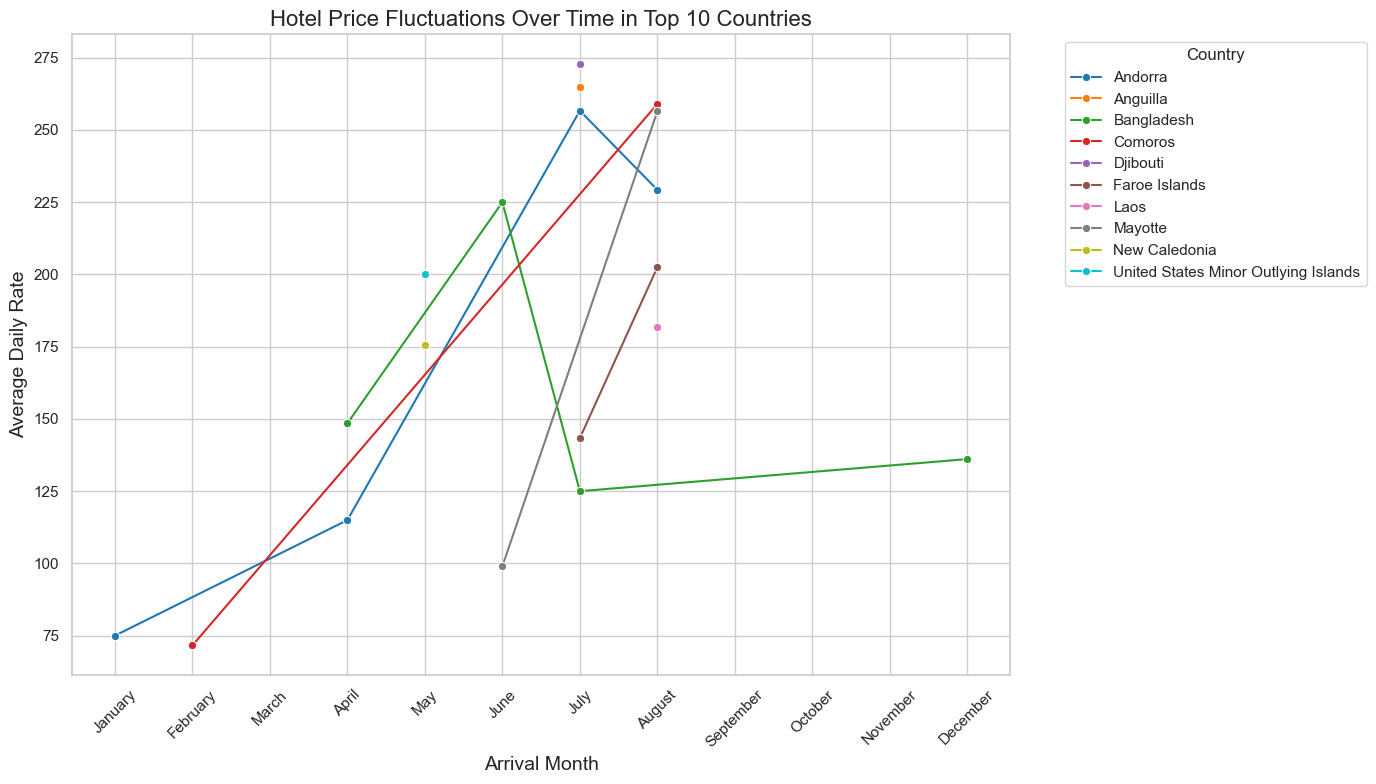

In [44]:
# Calculate the average daily rate by month and country
average_rate_by_month_country = hotel_tourism_df.groupby(['Arrival Month', 'Country'])['Average daily rate'].mean().reset_index()

# Select the top 10 countries based on the overall average daily rate
top_10_countries = average_rate_by_month_country.groupby('Country')['Average daily rate'].mean().nlargest(10).index

# Filter the data for the top 10 countries
top_10_data = average_rate_by_month_country[average_rate_by_month_country['Country'].isin(top_10_countries)]

# Set the order of arrival months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
top_10_data['Arrival Month'] = pd.Categorical(
    top_10_data['Arrival Month'],
    categories=month_order,
    ordered=True
)

# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=top_10_data,
    x='Arrival Month',
    y='Average daily rate',
    hue='Country',
    marker='o',
    palette='tab10'
)

# Add titles and labels
plt.title('Hotel Price Fluctuations Over Time in Top 10 Countries', fontsize=16)
plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_32114/2132052712.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


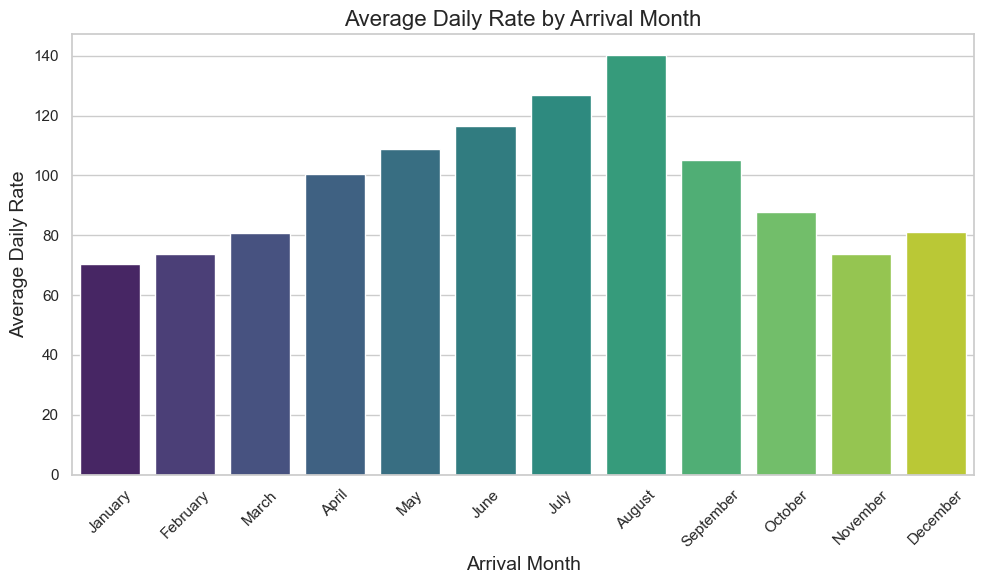

In [46]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for average daily rates by arrival month
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=average_rate_by_month,
    x='Arrival Month',
    y='Average daily rate',
    palette='viridis'
)

# Add titles and labels
plt.title('Average Daily Rate by Arrival Month', fontsize=16)
plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


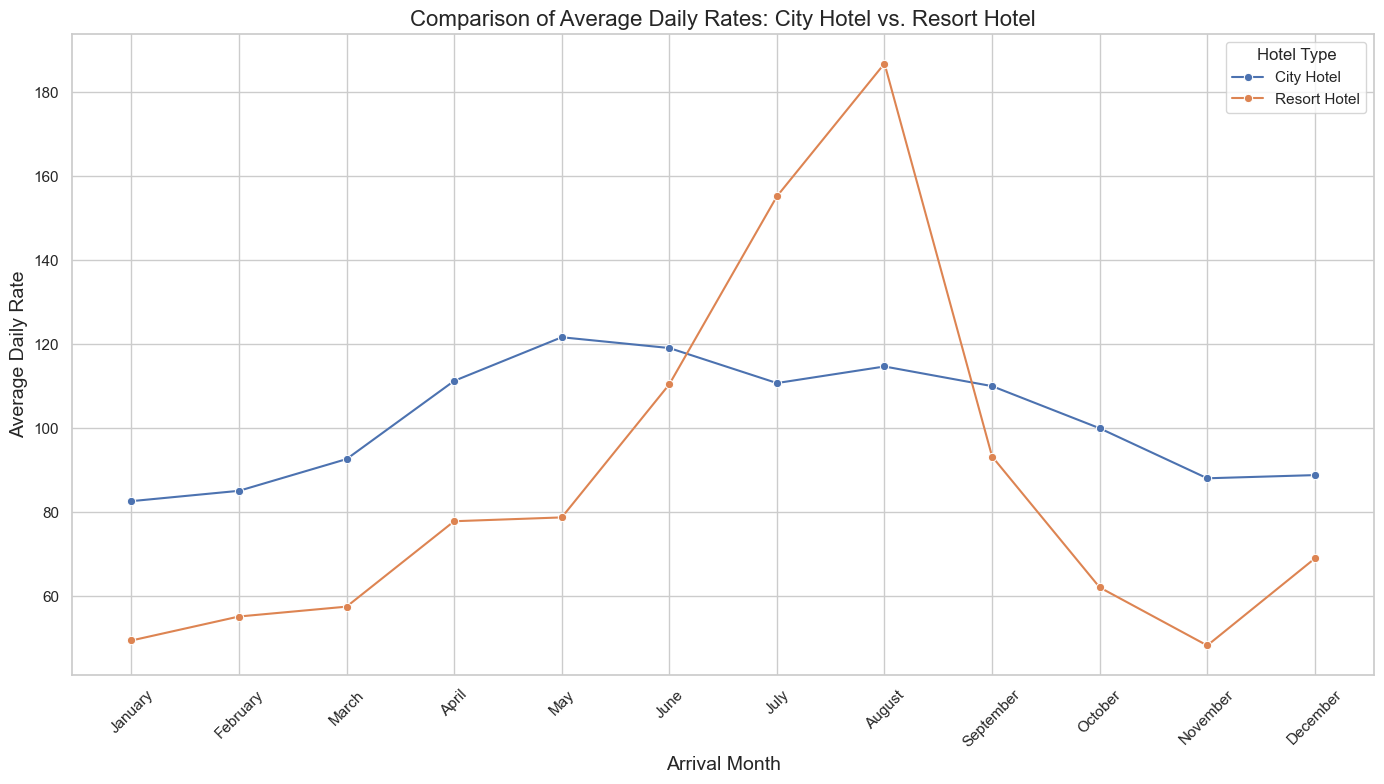

In [52]:
# Filter the data for city hotels and resort hotels
filtered_data = average_rate_by_hotel_month[average_rate_by_hotel_month['Hotel Type'].isin(['City Hotel', 'Resort Hotel'])]

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a line plot for average daily rates by hotel type and arrival month
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(
    data=filtered_data,
    x='Arrival Month',
    y='Average Daily Rate',
    hue='Hotel Type',
    marker='o'  # Adds markers to each data point
)

# Add titles and labels
plt.title('Comparison of Average Daily Rates: City Hotel vs. Resort Hotel', fontsize=16)
plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(title='Hotel Type')

# Show the plot
plt.tight_layout()
plt.show()

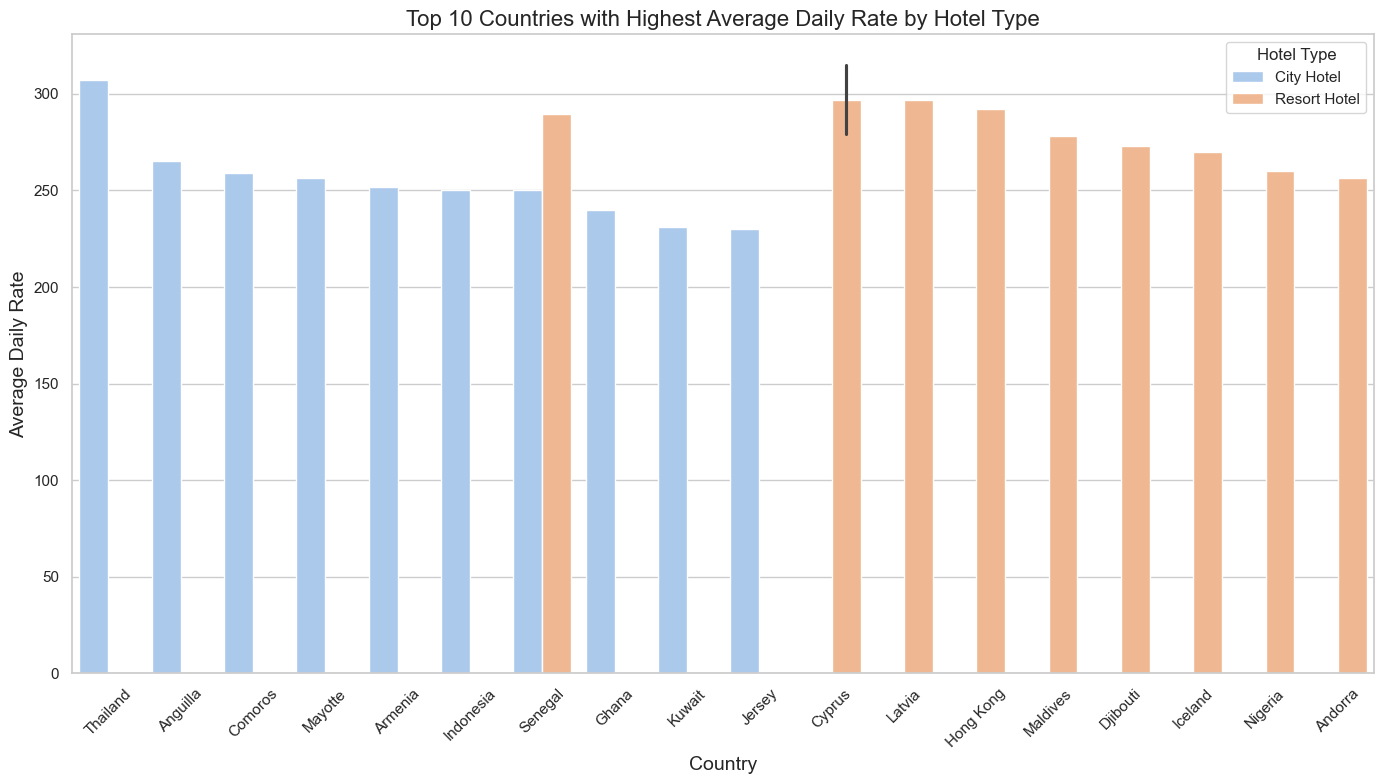

In [54]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for top countries by average daily rate
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_countries_combined,
    x='Country',
    y='Average daily rate',
    hue='Hotel type',
    palette='pastel'
)

# Add titles and labels
plt.title('Top 10 Countries with Highest Average Daily Rate by Hotel Type', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(title='Hotel Type')

# Show the plot
plt.tight_layout()
plt.show()

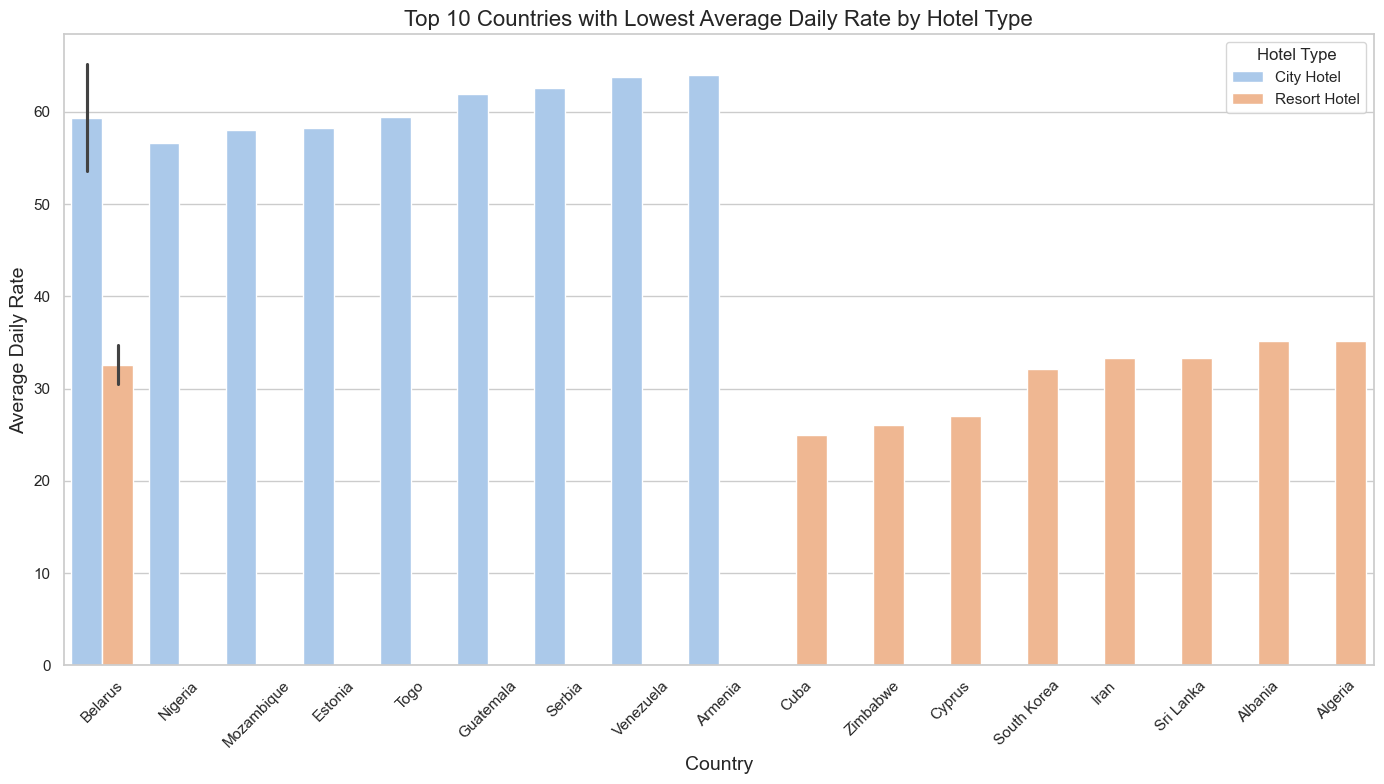

In [57]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for lowest countries by average daily rate
plt.figure(figsize=(14, 8))
sns.barplot(
    data=lowest_countries_combined,
    x='Country',
    y='Average daily rate',
    hue='Hotel type',
    palette='pastel'
)

# Add titles and labels
plt.title('Top 10 Countries with Lowest Average Daily Rate by Hotel Type', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(title='Hotel Type')

# Show the plot
plt.tight_layout()
plt.show()